In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Sanity check 
#df.shape
#df.head
#df.tail
print(df.size)
print(df.info())
print(df.describe())


64658
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2939 non-null   int64  
 2   Status                           2939 non-null   object 
 3   Life expectancy                  2929 non-null   float64
 4   Adult Mortality                  2929 non-null   float64
 5   infant deaths                    2939 non-null   int64  
 6   Alcohol                          2745 non-null   float64
 7   percentage expenditure           2939 non-null   float64
 8   Hepatitis B                      2386 non-null   float64
 9   Measles                          2939 non-null   int64  
 10   BMI                             2905 non-null   float64
 11  under-five deaths                2939 non-null   int64  
 12  Polio         

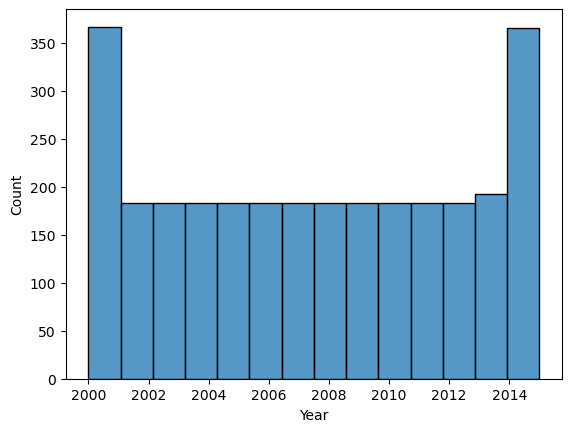

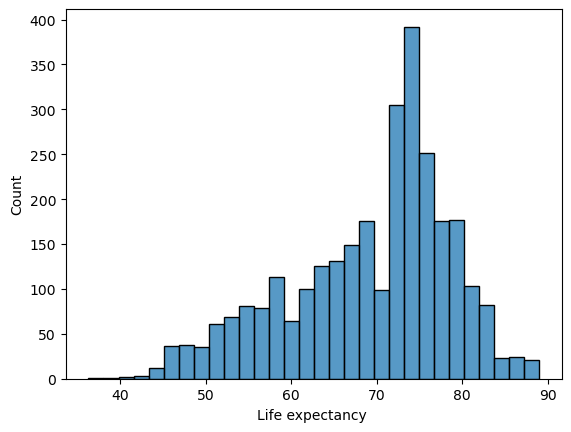

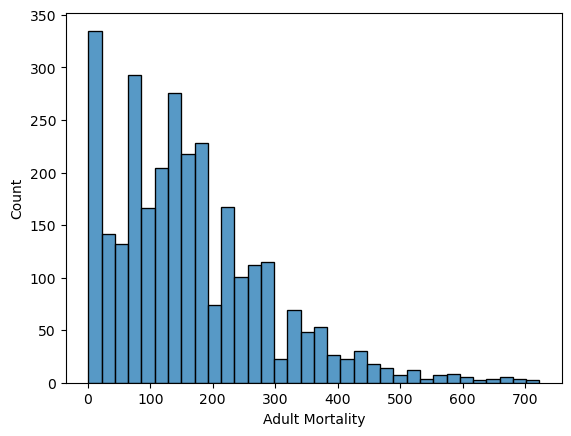

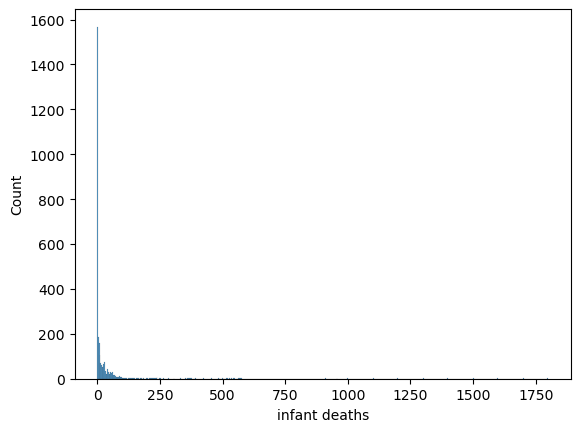

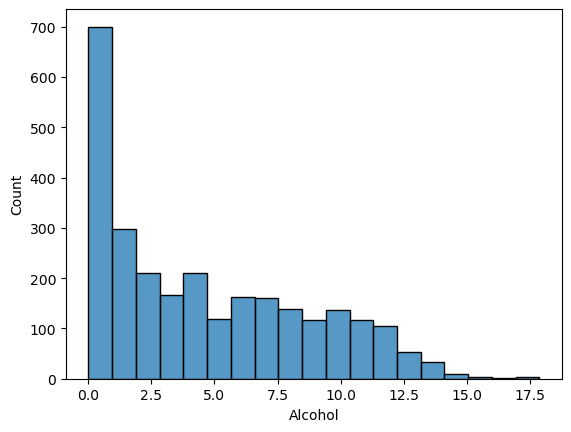

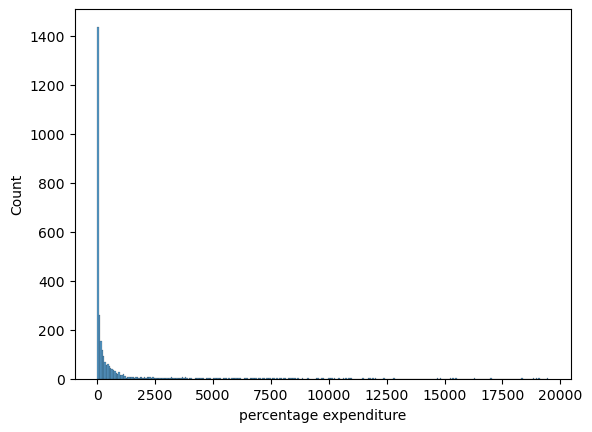

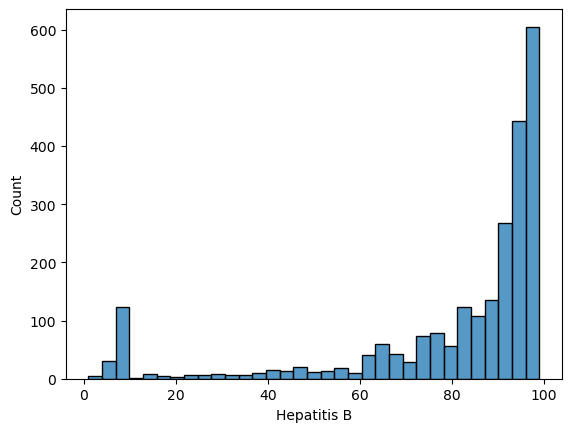

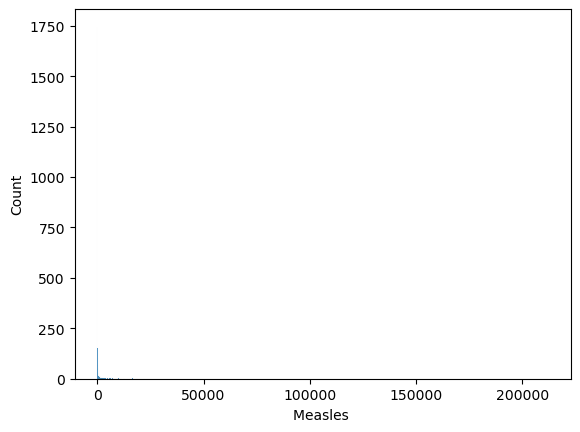

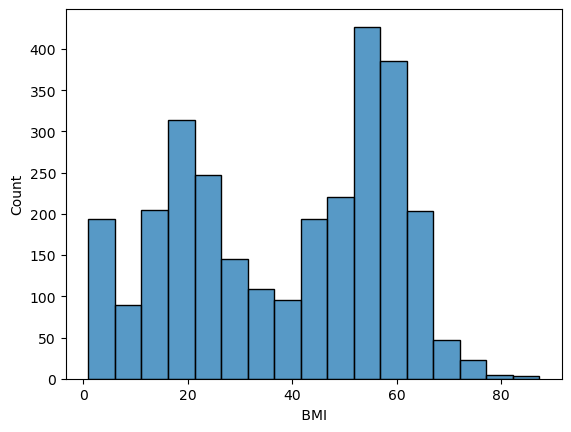

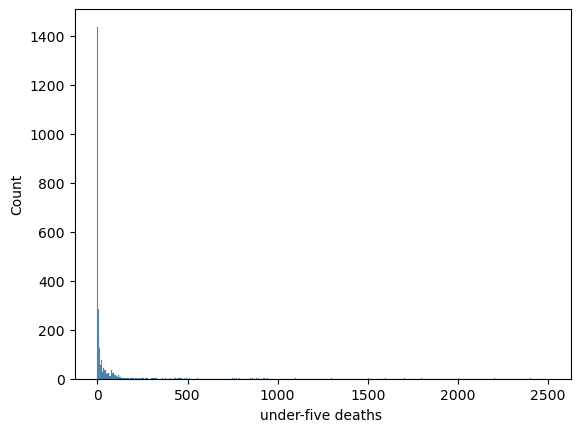

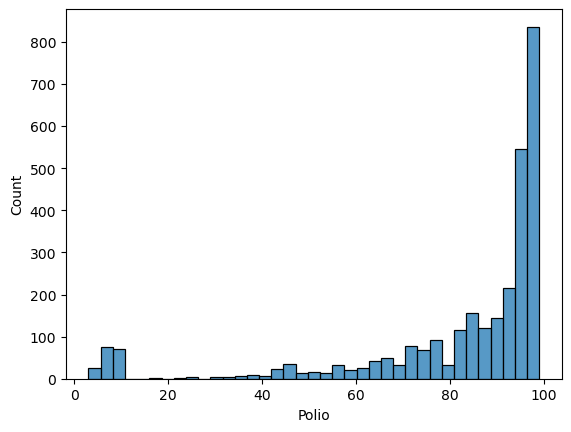

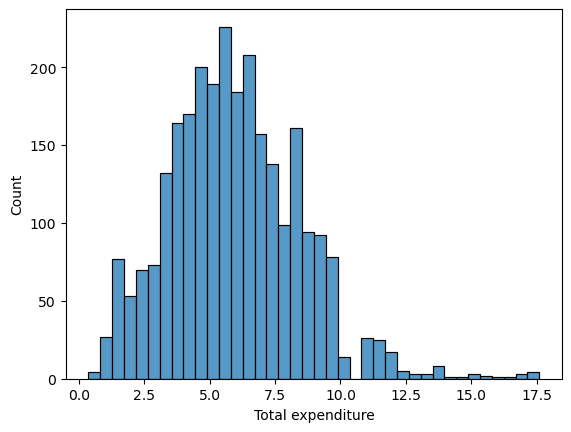

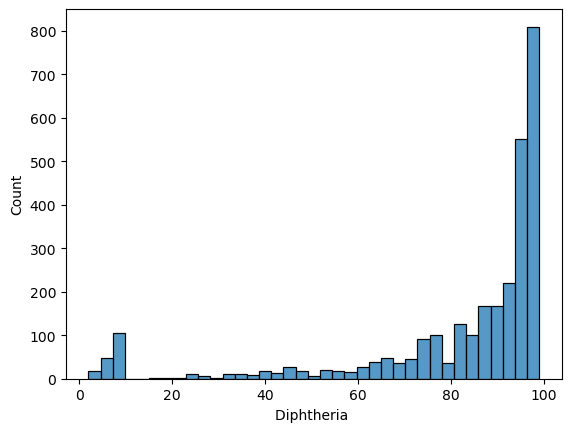

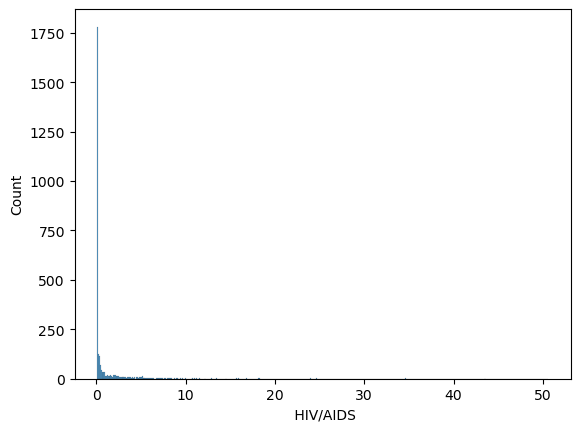

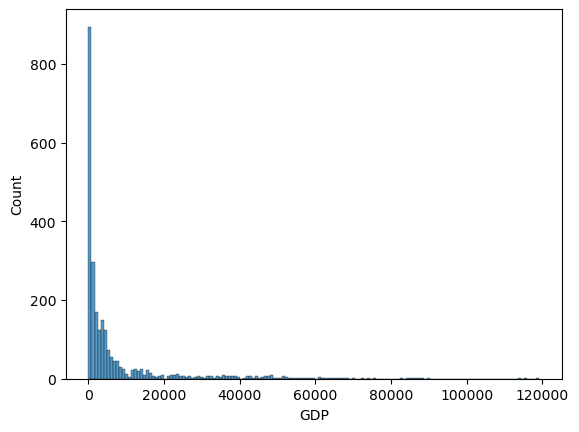

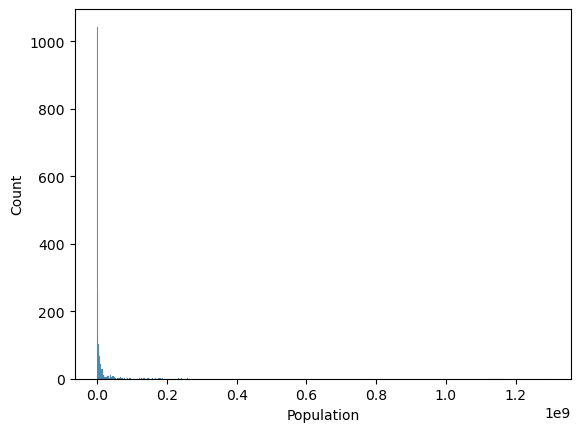

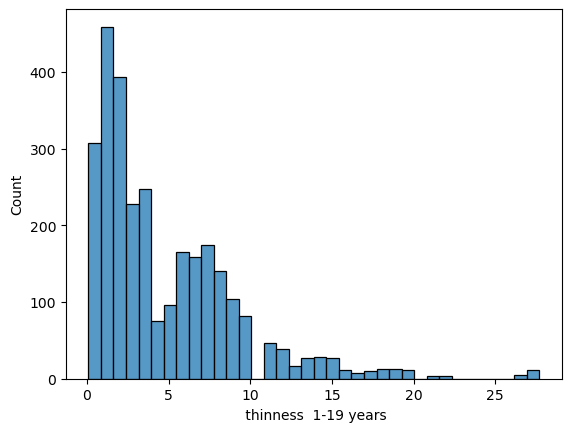

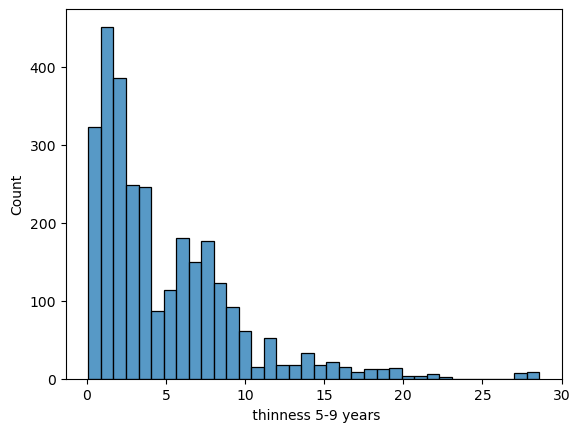

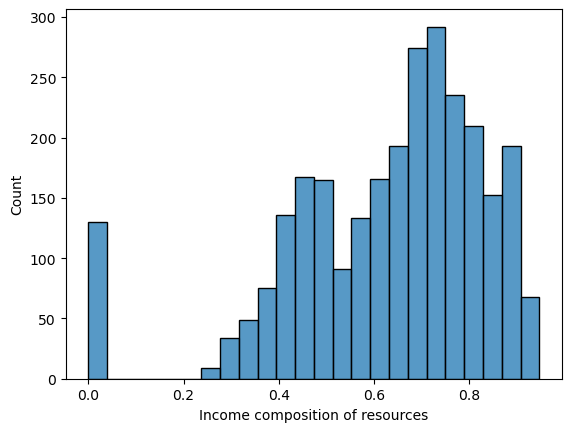

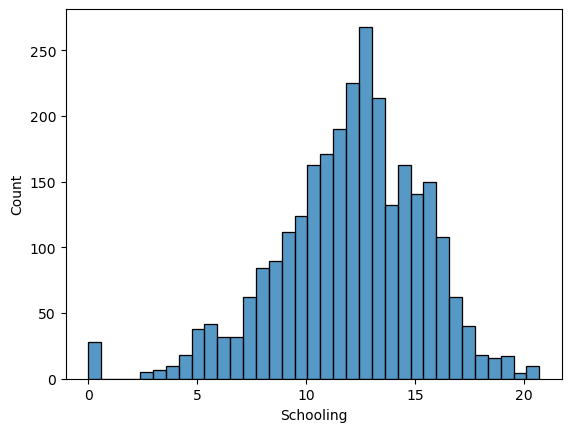

In [7]:
#EDA
#Histogram using loop
numeric_df = df.select_dtypes(include="number")
#numeric_df


for i in numeric_df.columns:
    sns.histplot(numeric_df[i])
    plt.show()

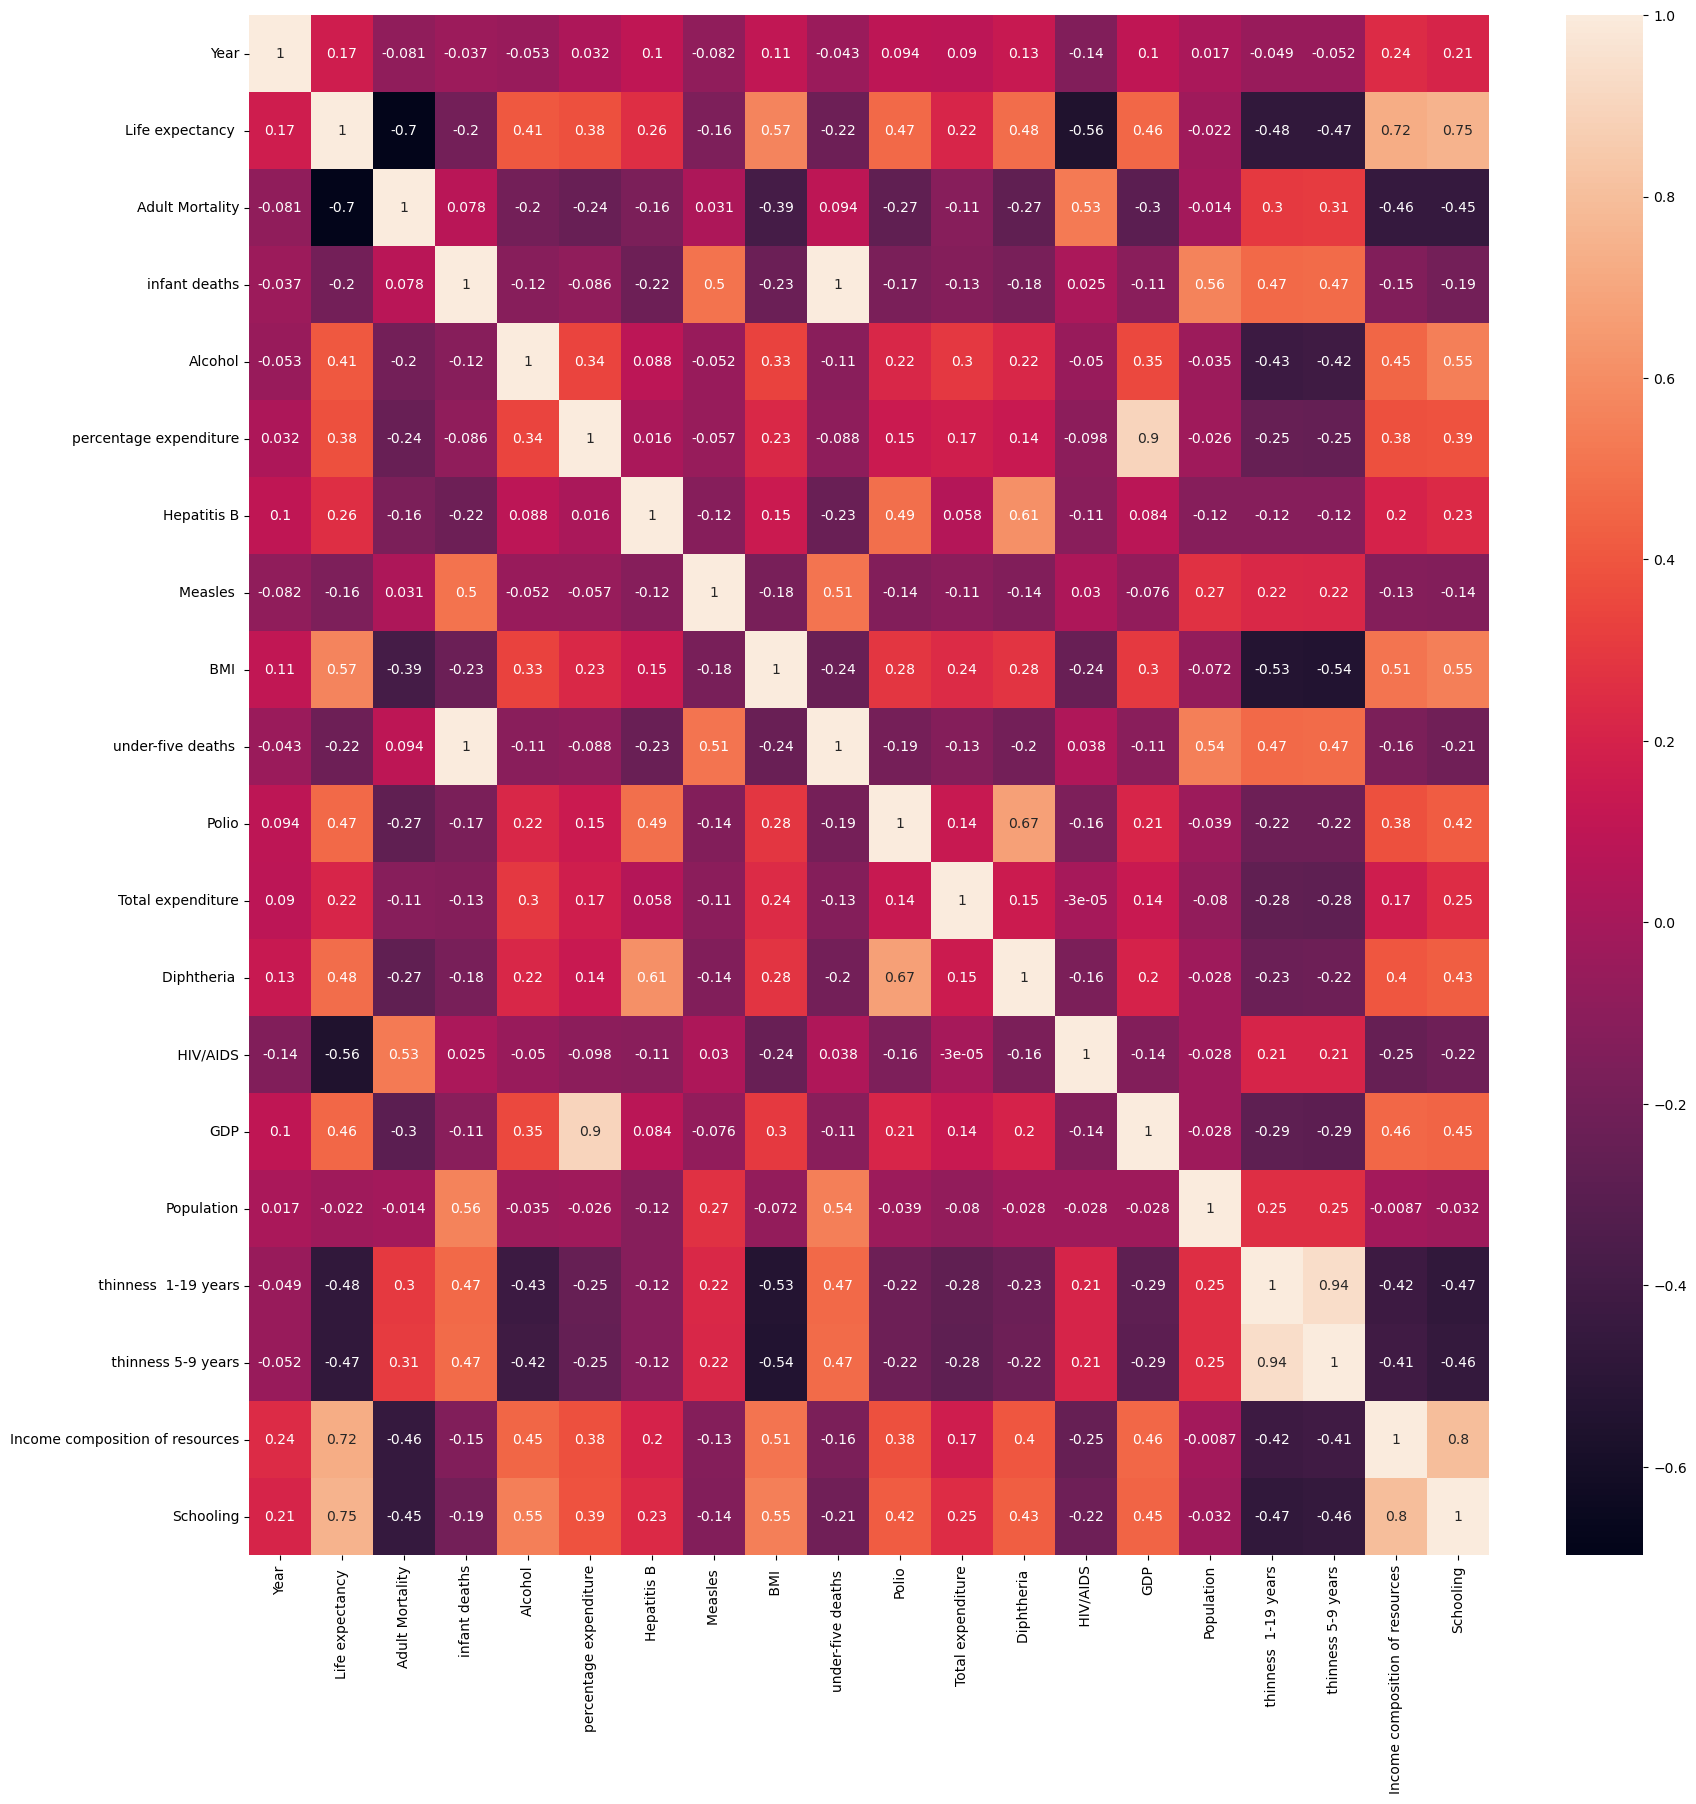

In [12]:
#df.head()
plt.figure(figsize=(20,20))
correlation= numeric_df.corr()
sns.heatmap(correlation, annot=True)
plt.show()


In [13]:
#Handling missing values
df.isnull().sum()

Country                              1
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
#Handling missing values by dropping
#lets drop data with missing value in (Life expectancy)
#df['Life expectancy'].dropna(axis=0)



In [26]:
#df["GDP"]=df["GDP"].fillna(0)#0 le fill garni bhaye sidhai ya 0 lekhna painxa
df["GDP"].fillna(df["GDP"].mean(),inplace=True)
df.isnull().sum()

df["Country"].fillna(df["Country"].mode()[0], inplace=True)
df.isnull().sum()

#df["Life Expectancy"].fillna(df["Life Expectancy"].mean(),inplace=True)
#df.isnull().sum()
#for loop
for i in['Total expenditure',' thinness  1-19 years',' thinness 5-9 years']:
    df[i].fillna(df[i].mean(),inplace=True)
df.isnull().sum()
    


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#Handling duplicate value
